In [1]:
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
from db_utils import RDSDatabaseConnector
from data_transformation import DataTransform
from information import DataFrameInfo
from plotter import Plotter
from dataframe_transformtion import DataFrameTransform
dftrans = DataFrameTransform()
plotter = Plotter()
rds_connector = RDSDatabaseConnector()
transformer = DataTransform()
inform = DataFrameInfo()

In [2]:
df = rds_connector.read_csv_data('loan_payments_data.csv')
df.head()
data = df.copy()

# Milestone 3 

## Task 1 Converting columns to correct format

Here I am changing the column types to datetimes for columns related to dates ('issue-date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date'). I am also removing non number charcters from the data in the term colum so that i can convert the term column in to an Int type. 

In [3]:
# Convertings colums to datetime
data = transformer.format_date(data, 'issue_date')
data = transformer.format_date(data, 'earliest_credit_line')
data = transformer.format_date(data,'last_payment_date')
data = transformer.format_date(data, 'next_payment_date')
data = transformer.format_date(data, 'last_credit_pull_date')
# Converting column to int
data = transformer.remove_non_numbers(data, 'term')
data = transformer.column_to_int(data, 'term')


# Task 2 gathering information about dataframe

Here I check the data types of each column.

In [4]:
inform.describe_data_type(data)

,Column_Name,Data_Type
0,id,int64
1,member_id,int64
2,loan_amount,int64
3,funded_amount,float64
4,funded_amount_inv,float64
5,term,Int64
6,int_rate,float64
7,instalment,float64
8,grade,object
9,sub_grade,object


Columns containg numeric data are copied and stored in a seperate dataframe called numeric data. The meadian, standard deviation and mean are then extracted.

In [5]:
# Dataframe containing numeric data
numeric_data = data[['id', 'member_id', 'loan_amount', 'funded_amount', 'funded_amount_inv', 'term', 'int_rate', 'instalment','annual_inc', 'dti', 'inq_last_6mths', 'open_accounts', 'total_accounts','out_prncp', 'out_prncp_inv','total_payment','total_payment_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_payment_amount']].copy()
inform.extract_statistics(numeric_data)


,50%,std,mean
id,7084590.0,9571361.647372,7621797.476277
member_id,8709873.0,10312806.882093,8655349.927993
loan_amount,12000.0,8082.196709,13333.0761
funded_amount,12000.0,8019.017599,13229.509117
funded_amount_inv,11300.0,8099.473527,12952.622979
term,36.0,10.719573,42.606199
int_rate,13.16,4.392893,13.507328
instalment,347.15,238.920012,400.013953
annual_inc,61000.0,51589.339577,72220.848249
dti,15.6,7.623124,15.867087


Catergorical data columns are made into a seperate dataframe where they are then inspected to see how many unique values they contain.

In [6]:
# categorical_df conatins categorical data
categorical_df = data[['grade', 'sub_grade','home_ownership','verification_status','loan_status','payment_plan','purpose','policy_code','application_type']]
inform.count_distinct(categorical_df)


,Column_Name,Distinct_Count
0,grade,7
1,sub_grade,35
2,home_ownership,5
3,verification_status,3
4,loan_status,9
5,payment_plan,2
6,purpose,14
7,policy_code,1
8,application_type,1


In [7]:
# Printing dataframe shape
inform.print_shape(data)

(54231, 43)

In [8]:
# Counting nulls and their percentage representaion in 
inform.generate_null_counts(data)


,Null Counts,Percentage Nulls
id,0,0.000000
member_id,0,0.000000
loan_amount,0,0.000000
funded_amount,3007,5.544799
funded_amount_inv,0,0.000000
term,4772,8.799395
int_rate,5169,9.531449
instalment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


## Task 3 removing/imputing missing values from the data

In [9]:
# Columns containg missing data 
columns_of_interest = ['funded_amount', 'term', 'int_rate', 'employment_length', 'mths_since_last_delinq', 'mths_since_last_record', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']
null_data = data[columns_of_interest]
null_data_info = inform.generate_null_counts(null_data)
null_data_info

,Null Counts,Percentage Nulls
funded_amount,3007,5.544799
term,4772,8.799395
int_rate,5169,9.531449
employment_length,2118,3.905515
mths_since_last_delinq,31002,57.166565
mths_since_last_record,48050,88.602460
last_payment_date,73,0.134609
next_payment_date,32608,60.127971
last_credit_pull_date,7,0.012908
collections_12_mths_ex_med,51,0.094042


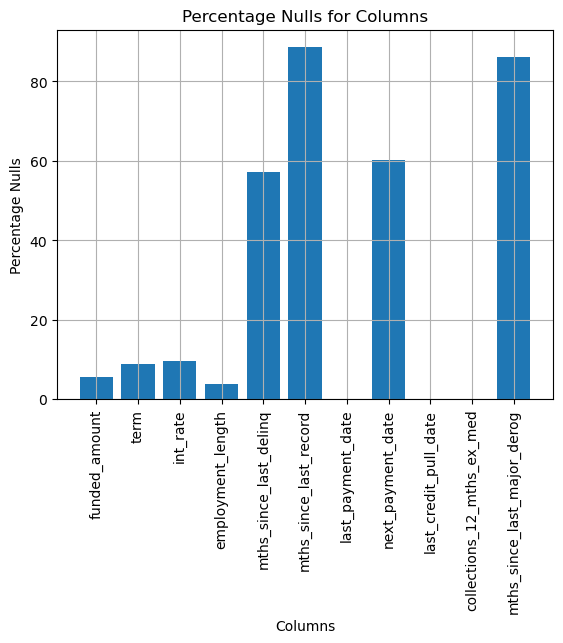

In [10]:
# visualising the null data
plotter.bar_chart_plot(null_data_info.index, null_data_info['Percentage Nulls'], xlabel='Columns', ylabel='Percentage Nulls', title='Percentage Nulls for Columns', rotation=90)

### Removing nulls
I removed the 'mths_since_last_delinq', 'mths_since_last_record' and 'mths_since_last_major_derog' as the have more thean 10% missing data. The reson why I did not remove 'next_payment_date' eventhough it has more than 10% nulls is that compared to the other columns that have more than 10% nulls is that there is enough ground truth data in the form of 'last_payment_date' to effectively impute the missing values in the 'next_payment_date' column.

Removing rows that have less 1% null data in the columns as removing them should not effect the overall properties of the data frame.

In [11]:
# removing columns that have more than 10% nulls except for next_payment_date there is enough information to work it out
data = dftrans.remove_columns(data, ['mths_since_last_delinq', 'mths_since_last_record','mths_since_last_major_derog'])
# removing rows where where less than 1% of the data in the column is null
data = dftrans.remove_null_rows(data, ['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med'])
inform.generate_null_counts(data)

,Null Counts,Percentage Nulls
id,0,0.000000
member_id,0,0.000000
loan_amount,0,0.000000
funded_amount,2998,5.541590
funded_amount_inv,0,0.000000
term,4762,8.802218
int_rate,5159,9.536044
instalment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


### Imputing missing data
In this section I impute the missing data in the 'next_payment_date' column using data from 'last_payment_date' and adding 1 month to it to geth the nest payment date.

In [12]:
# missing data 
data = dftrans.fix_next_payment_dates(data, 'next_payment_date', 'last_payment_date')

Imputing missing data with approriate method mean, median, mode based on the skewness of the data and wheather it is numerical or categorical. In this case I used median to fill the missing data in 'funded_amount' and 'int_rate' as both columns showed a  positive skew of 0.8208 (4sf) and  0.4112 (4sf) respectively. Mode is used to impute the missing values in the 'term' and 'employment_length' columns as they are categorical data.

In [13]:
# missing data in columns are imputed with repective method
data = dftrans.replace_nulls_with_median(data, 'funded_amount')
data = dftrans.replace_nulls_with_mode(data, 'term')
data = dftrans.replace_nulls_with_median(data, 'int_rate')
data = dftrans.replace_nulls_with_mode(data, 'employment_length')

In [14]:
with open('no_null_data.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

no_null_data = data.copy()


## Task 4 normalising the data

In this section the skew of the columns of the datat frame that hold numeric data are vinualised and inspected to see the skew of the data. Data that has a skew between -0.5 and 0.5 will not be normalised otherwise one of three methods will be used to normalise the data: log transformation, Box-Cox transformation or Yeo-Johnson transformation. To determin which transformation will be used to normalise the data each method will be tested for each data column and the the mthod that brings the skewness closses to 0 will be the transformation used to normalise that data column.
View the data_visualisation notebook to see the originial skewness of the column as well as theier skewness after applying each transformation. You can see that Box-cox transformation was not applied to all of the columns as some of the coumns contain 0 and Box-Cox xan only be applied to positive datat (0 < data).

In [15]:
# copy of data frame 
test_data_1 = data.copy()
test_data_1 = dftrans.box_cox_transformation(test_data_1,'loan_amount')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'funded_amount')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'funded_amount_inv')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'instalment')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'annual_inc')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'open_accounts')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_accounts')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_rec_prncp')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'total_payment')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'total_payment_inv')
test_data_1 = dftrans.box_cox_transformation(test_data_1, 'total_rec_int')
test_data_1 = dftrans.yeo_johnson_transformation(test_data_1, 'last_payment_amount')

In [16]:
data_copy = test_data_1.copy()


## Task 5 removing outliers

In this section, a z-score is calculated to identify outliers in numeric columns. If the z-score of any data point falls below -3 or exceeds 3, it is classified as an outlier and subsequently removed. This process aims to mitigate the disproportionate influence outliers may have on statistical analyses, ensuring that results accurately reflect the majority of the data. By removing outliers, the analysis becomes more robust and less prone to skewing effects caused by extreme values, thereby enhancing the reliability of the findings.

In [17]:
# continuous data columns
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

for column in outlier_columns: # For each column that will have outliers removed.
    data_copy = dftrans.remove_outliers(data_copy, column) # Drop the rows which contain 'z score' greater than 3 for the column being iterated.
 


## Task 6 dropping overly corelated columns
In this section the correlation between the columns are inspected to imporve the accuracy and interpretability of models built on the data.

In [18]:
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']
data_copy_num = data_copy[outlier_columns]
px.imshow(data_copy_num.corr(), title='Correlation between data', width = 800 , height = 600)

In [19]:
data_copy_num.corr()

,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,open_accounts,total_accounts,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,last_payment_amount
loan_amount,1.000000,0.966649,0.965198,0.056838,0.962612,0.478103,0.048319,0.232695,0.264926,0.815926,0.799575,0.680027,0.763661,0.376004
funded_amount,0.966649,1.000000,0.943449,0.059080,0.940537,0.463680,0.050841,0.227210,0.257294,0.792765,0.778901,0.659851,0.744250,0.365700
funded_amount_inv,0.965198,0.943449,1.000000,0.071012,0.937033,0.463581,0.065903,0.232595,0.264304,0.787017,0.828030,0.650558,0.746724,0.369637
int_rate,0.056838,0.059080,0.071012,1.000000,0.070595,0.012647,0.168907,0.047059,0.032631,0.039590,0.049867,0.020070,0.069065,0.035021
instalment,0.962612,0.940537,0.937033,0.070595,1.000000,0.469958,0.056175,0.232178,0.247439,0.814455,0.795955,0.702855,0.715408,0.383701
annual_inc,0.478103,0.463680,0.463581,0.012647,0.469958,1.000000,0.008141,0.271777,0.374735,0.422011,0.413850,0.383651,0.312395,0.231895
dti,0.048319,0.050841,0.065903,0.168907,0.056175,0.008141,1.000000,0.069912,0.052481,-0.016232,-0.000830,-0.031253,0.026058,0.013955
open_accounts,0.232695,0.227210,0.232595,0.047059,0.232178,0.271777,0.069912,1.000000,0.696688,0.157985,0.159974,0.130525,0.155578,0.087321
total_accounts,0.264926,0.257294,0.264304,0.032631,0.247439,0.374735,0.052481,0.696688,1.000000,0.204927,0.208958,0.185815,0.142876,0.148796
total_payment,0.815926,0.792765,0.787017,0.039590,0.814455,0.422011,-0.016232,0.157985,0.204927,1.000000,0.971291,0.953459,0.714425,0.549531


In [20]:
inform.compute_vif(data_copy, outlier_columns)

c:\Users\samie\OneDrive\Desktop\ai core\exploratory_data_analysis_finance\exploratory-data-analysis---customer-loans-in-finance925\information.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Variable,VIF
0,loan_amount,83.854765
1,funded_amount,16.891794
2,funded_amount_inv,113.512750
3,int_rate,1.042799
4,instalment,17.540717
5,annual_inc,1.439809
6,dti,1.051953
7,open_accounts,1.986908
8,total_accounts,2.135458
9,total_payment,165.568792


In [21]:
with open('normalised_data.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

The data with the highest correlation using 0.85 as the cutoff point:
loan_amount, funded_amount = 0.966649
loan_amount, funded_amount_inv = 0.965198
loan_amount, installment = 0.962612
funded_amount, loan_amount = 0.966649
funded_amount, funded_amount_inv = 0.943449
funded_amount, installment = 0.940537
funded_amount_inv, loan_amount = 0.965198
funded_amount_inv, funded_amount = 0.943449
funded_amount_inv, installment = 0.937033
installment, loan_amount = 0.962612
installment, funded_amount = 0.940537
installment, funded_amount_inv = 0.937033

Colinearity between: (loan_amount, funded_amount), (loan_amount, funded_amount_inv), (loan_amount, installment), (funded_amount, loan_amount), (funded_amount, funded_amount_inv), (funded_amount_inv, installment)

Multicolinearity between : funded_amount_inv, total_payment, total_payment_inv, total_rec_prncp, installment.

While collinearity is evident between individual pairs of variables, multicollinearity is observed among groups of three or more variables, indicating redundant information among them. These relationships may pose challenges in regression analysis and should be addressed through techniques such as feature selection, regularisation, or data transformation to improve model stability and interpretability.I have decided not to remove them as I belive lossing these data may do greater harm than good as key information will be lost.

In [22]:
# dataframe formatted (dff for short) 
dff = no_null_data.copy()



## Milestone 4

### Task 1
summarise what percentage of the loan amount is paid back compared to the total payment expected with interest, and get a prediction for 6 months into the future

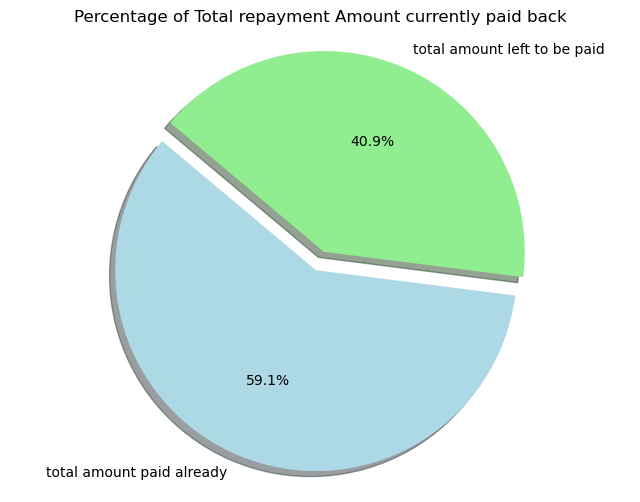

Total repayment amount expected: £1107627116.42
total amount oof payment recived: £654573341.6441469
59.09690472004839%


In [23]:
# computing total 
dff['amount_expect_with_int'] = dff['loan_amount'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(dff['term']/12)))
dff['remaing_amount_to_be_payed'] = dff['amount_expect_with_int'] - dff['total_payment']
total_amount_expected = dff['amount_expect_with_int'].sum()
total_amount_recived = dff['total_payment'].sum()
total_amount_remaining = dff['remaing_amount_to_be_payed'].sum()
sizes1 = [total_amount_recived,total_amount_remaining]
colors = ['lightblue', 'lightgreen']
explode1 = (0.1, 0)  
labels1 = ['total amount paid already','total amount left to be paid']
plt.figure(figsize=(8, 6))
plt.pie(sizes1, explode=explode1, labels=labels1, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Total repayment Amount currently paid back')
plt.axis('equal') 
plt.show()
print(f'Total repayment amount expected: £{total_amount_expected}')
print(f'total amount oof payment recived: £{total_amount_recived}')
print(f'{(total_amount_recived/total_amount_expected)*100}%')

From the pie chart aproximatly 59% of the expected amount to be paid has be paid back.

In [24]:
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 1 month into the future
dff['pred_total_payment_1mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(1/12)))
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 2 month into the future
dff['pred_total_payment_2mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(2/12)))
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 3 month into the future
dff['pred_total_payment_3mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(3/12)))
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 4 month into the future
dff['pred_total_payment_4mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(4/12)))
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 5 month into the future
dff['pred_total_payment_5mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(5/12)))
# Predidtion of percentage of the amount paid back compared to the total payment expected with interest 6 month into the future
dff['pred_total_payment_6mths'] = dff['total_payment'] + (dff['loan_amount'] * ((dff['int_rate']/100)*(6/12)))

# total amount currently recived
total_amount_recived = dff['total_payment'].sum()
# total amount predicted to recive upto 6 months
pred_total_amount_recived_1mth = dff['pred_total_payment_1mths'].sum()
pred_total_amount_recived_2mth = dff['pred_total_payment_2mths'].sum()
pred_total_amount_recived_3mth = dff['pred_total_payment_3mths'].sum()
pred_total_amount_recived_4mth = dff['pred_total_payment_4mths'].sum()
pred_total_amount_recived_5mth = dff['pred_total_payment_5mths'].sum()
pred_total_amount_recived_6mth = dff['pred_total_payment_6mths'].sum()

# total amount predicted to recive upto 6 months compared to total expected amount to recive as a percentage
Total_repayment_Amount_per = (total_amount_recived/total_amount_expected) * 100
pred_1mth_Total_repayment_Amount_per = (pred_total_amount_recived_1mth/total_amount_expected) * 100
pred_2mth_Total_repayment_Amount_per = (pred_total_amount_recived_2mth/total_amount_expected) * 100
pred_3mth_Total_repayment_Amount_per = (pred_total_amount_recived_3mth/total_amount_expected) * 100
pred_4mth_Total_repayment_Amount_per = (pred_total_amount_recived_4mth/total_amount_expected) * 100
pred_5mth_Total_repayment_Amount_per = (pred_total_amount_recived_5mth/total_amount_expected) * 100
pred_6mth_Total_repayment_Amount_per = (pred_total_amount_recived_6mth/total_amount_expected) * 100
 # printing percentages
pred_total_payments_upto_6mth = {'total_payment_present':Total_repayment_Amount_per,'pred_total_payment_1mths': pred_1mth_Total_repayment_Amount_per, 'pred_total_payment_2mths': pred_2mth_Total_repayment_Amount_per, 'pred_total_payment_3mths':pred_3mth_Total_repayment_Amount_per, 'pred_total_payment_4mths': pred_4mth_Total_repayment_Amount_per, 'pred_total_payment_5mths':pred_5mth_Total_repayment_Amount_per, 'pred_total_payment_6mths':pred_6mth_Total_repayment_Amount_per}
print(pred_total_payments_upto_6mth)
ms4_t1 = pd.DataFrame(pred_total_payments_upto_6mth,index=[0])

{'total_payment_present': 59.09690472004839, 'pred_total_payment_1mths': 59.85677096258284, 'pred_total_payment_2mths': 60.61663720511731, 'pred_total_payment_3mths': 61.37650344765174, 'pred_total_payment_4mths': 62.1363696901862, 'pred_total_payment_5mths': 62.89623593272066, 'pred_total_payment_6mths': 63.656102175255114}


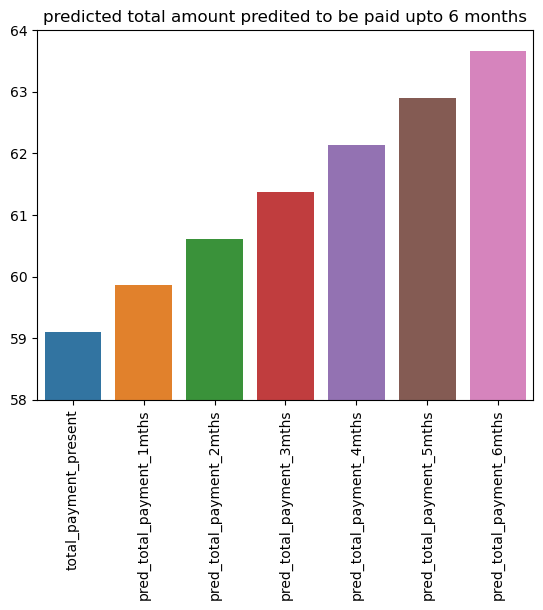

In [25]:
# Create the bar plot
ax = sns.barplot(data=ms4_t1)
# Set the y-axis limits
ax.set(ylim=(58, 64))  
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Show the plot
plt.title('predicted total amount predited to be paid upto 6 months')
plt.show()

### Task2
Calcilating what percentage of loans have been charged off.

In [26]:
# masks to get 
charged_off_mask = dff['loan_status'] == 'Charged Off'
charged_off_mask2 = dff['loan_status'] == 'Fully Paid'
charged_off_mask3 = dff['loan_status'] == 'Does not meet the credit policy. Status:Charged Off' 
# Charged_off_df contains the data where the loan status is 'Charged Off' or 'Does not meet the credit policy. Status:Charged Off'  as they are the loans that are charged off
charged_off_df = dff.loc[charged_off_mask | charged_off_mask3].copy()
charged_off_df
# Clacualting perecentage of loans that have loan statuse charged off
percentage_loss = (len(charged_off_df) / len(dff)) * 100
percentage_remaining = 100 - percentage_loss
print(f'percentage of loans charged off: {percentage_loss}%')
print(f'percentage of loans not charged off: {percentage_remaining}%')




percentage of loans charged off: 10.818853974121996%
percentage of loans not charged off: 89.18114602587801%


In [27]:
# plotting a sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = 'black', width = 0.5),
        label = ['total loans', 'Others', 'Charged Off'],
        # total loans: 0, current: 1, paid off: 2, charged off: 3 
        color = 'Blue'
    ),
    link = dict(
        source = [0, 0],
        target = [1, 2],
        value = [percentage_remaining,percentage_loss]
    )
)])

fig.update_layout(title_text="Sankey Diagram charged of loans comapred to other loans", font_size=10)
fig.show()


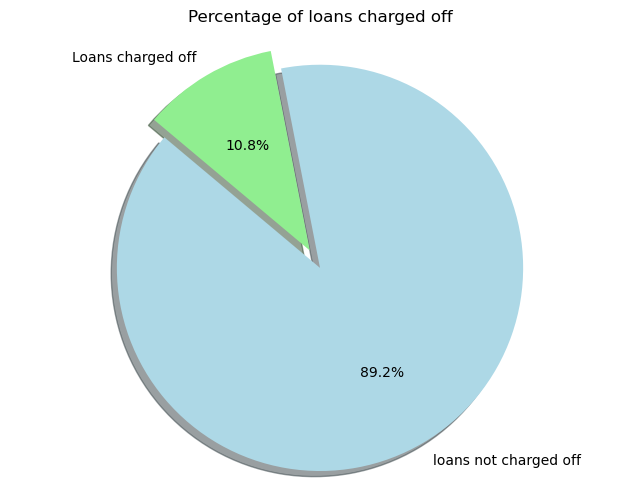

In [28]:
# pie chart to visualise what percentage of loans are charged off
sizes = [percentage_remaining,percentage_loss]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  
labels = ['loans not charged off','Loans charged off']
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of loans charged off')
plt.axis('equal')  
plt.show()


In [29]:
# amount paid already by loans that have loan status charged off
# total amount paid by charged off loans
charged_off_total_amount_paid = charged_off_df['total_payment'].sum()
# total amount expected from charged off loans 
charged_off_total_amount_expected = charged_off_df['amount_expect_with_int'].sum()
# percentage of expected amount that has been paid back by charged of loans 
percentage_paid_charged_off_loans = (charged_off_total_amount_paid / charged_off_total_amount_expected) * 100
print(f'total repay amount paid off by charged off loans: £ {charged_off_total_amount_paid}')
print(f'percentage of total repay amount owed by charged off loans that have been paid: {percentage_paid_charged_off_loans} % ')


total repay amount paid off by charged off loans: £ 39092575.243503466
percentage of total repay amount owed by charged off loans that have been paid: 30.234722547271225 % 


### Task 3

In [30]:
# Calculating loss in revenue caused by charged off leans
loss_from_charged_off_loans = charged_off_total_amount_expected - charged_off_total_amount_paid
percentage_loss_charged_off_loans = (loss_from_charged_off_loans / charged_off_total_amount_expected) * 100
print(f'total repayment amount left to be paid by charged off loans: £ {loss_from_charged_off_loans}')
print(f'percentage of total repay amount owed by charged off loans that have not been paid: {percentage_loss_charged_off_loans} %')

total repayment amount left to be paid by charged off loans: £ 90204378.55649655
percentage of total repay amount owed by charged off loans that have not been paid: 69.76527745272877 %


In [31]:
# Principal loan amount must be paid off before profit can be taken even if charged off. So 
charged_off_total_loan_amount = charged_off_df['loan_amount'].sum() # total loan amount taken out by charged off loans
charged_off_total_amout_paid = charged_off_df['total_payment'].sum() # in prevous code block how much has paid already
charged_off_expected_revenue = charged_off_total_amount_expected - charged_off_total_loan_amount # how much would of been made from the interest
charged_off_prnc_loan_remaining = charged_off_total_loan_amount - charged_off_total_amout_paid # how much profit or loss is made from the current amount alrady paid
loss_in_revenues = charged_off_expected_revenue + charged_off_prnc_loan_remaining # expected rvenue + how much profit or loss is made from the current amount alrady paid
print(f'revenue lost from charged off loans: £{round(loss_in_revenues,2)}')

revenue lost from charged off loans: £90204378.56


In [32]:
# Calculating how many months the charged of loans have paid off 
charged_off_df['months_paid'] = round(charged_off_df['total_payment'] / charged_off_df['instalment'])
# Calculating how many months/payment are left to be paid back   
charged_off_df['months_left_to_be_paid'] = charged_off_df['term'] - charged_off_df['months_paid']
# Calculating the total remaing interest to be paid by loans
charged_off_df['remaining_interest'] = (charged_off_df['months_left_to_be_paid'] / 12) * (charged_off_df['int_rate']/100) * charged_off_df['loan_amount']
# Interest payments per month
charged_off_df['interest_payment_per_month'] = (1 / 12) * (charged_off_df['int_rate']/100) * charged_off_df['loan_amount']
# Data frame for just projected losses
max_term = max(charged_off_df['term'])
# Making a dataframe 
projected_loss_df = pd.DataFrame(columns=[f'Month_{i+1}' for i in range(max_term)])

# Calculating projeted revenue loss for entire term of the loans
for index, row in charged_off_df.iterrows():
    for term in range(max_term):
        if term+1 <= row['term']:
            projected_loss_df.loc[index, f'Month_{term+1}'] = (term+1) * row['interest_payment_per_month']
        else:
            projected_loss_df.loc[index, f'Month_{term+1}'] = row['term'] * row['interest_payment_per_month']


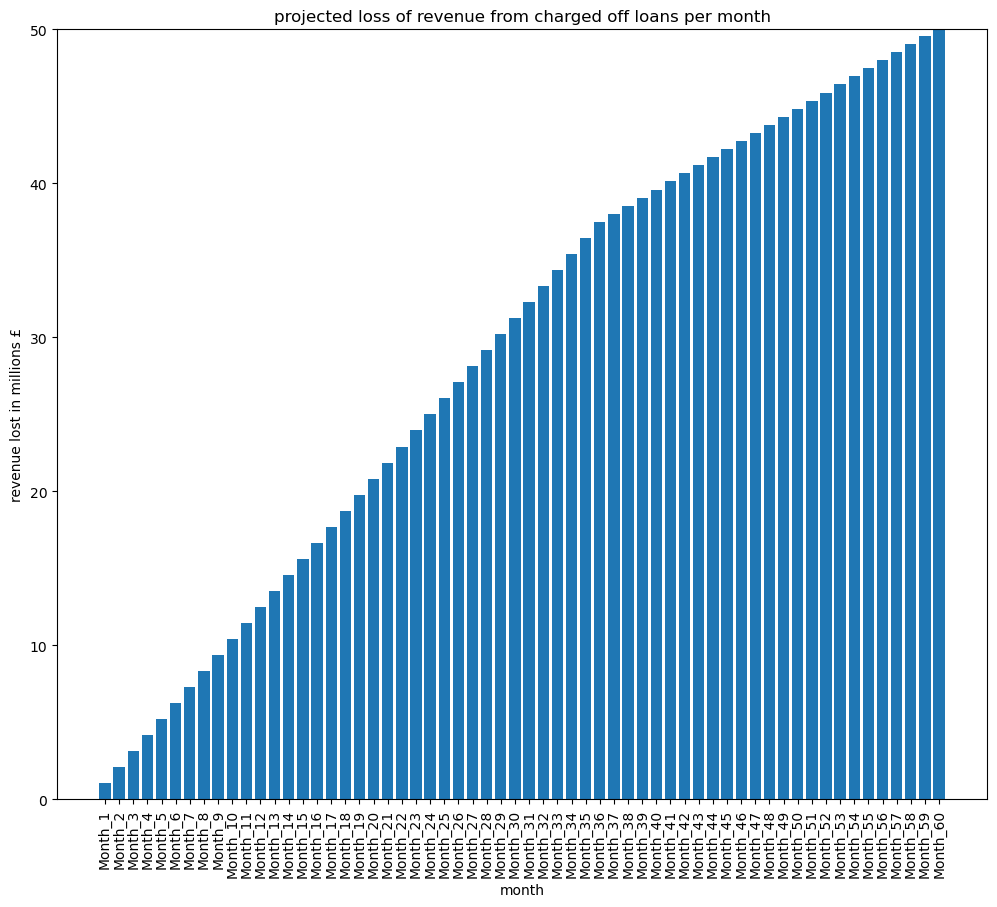

In [33]:
# Summing the monthly payments to calculate the total loss in revenue through out the term of the loan
cumulative_loss_series = projected_loss_df.sum(axis=0)
# Dividing the values by 1 million to make it fit better on the graph
cumulative_loss_series =cumulative_loss_series /1000000
# dataFrame with a single row containing the cumulative loss
cumulative_loss_df = pd.DataFrame([cumulative_loss_series], columns=cumulative_loss_series.index)
plt.figure(figsize=(12,10))
plt.ylim(0,50)
plotter.bar_chart_plot(index = cumulative_loss_df.columns, values = cumulative_loss_df.values.flatten(), xlabel='month', ylabel='revenue lost in millions £', title='projected loss of revenue from charged off loans per month', rotation=90, grid = False)




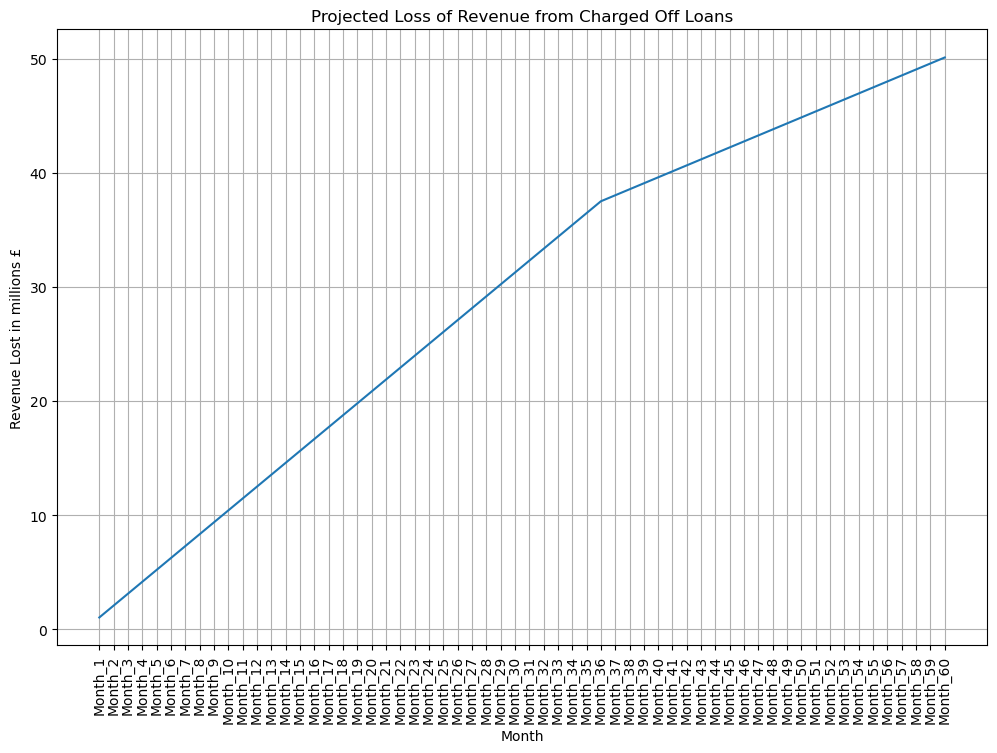

In [34]:
plt.figure(figsize=(12,8))

plt.plot(cumulative_loss_df.columns, cumulative_loss_df.values.flatten())
plt.xlabel('Month')
plt.ylabel('Revenue Lost in millions £')
plt.title('Projected Loss of Revenue from Charged Off Loans')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


From both of the graphs we can se a constant rate of loss up unntil month 36 after which the rate of loss decreases.

### Task 4
Calculating possible loss

In [35]:
# Looking at late loans that have loan_status late
unique_values = dff['loan_status'].value_counts()
print(unique_values)


loan_status
Fully Paid                                             27011
Current                                                19267
Charged Off                                             5500
Does not meet the credit policy. Status:Fully Paid       966
Late (31-120 days)                                       580
Does not meet the credit policy. Status:Charged Off      353
In Grace Period                                          265
Late (16-30 days)                                        106
Default                                                   52
Name: count, dtype: int64


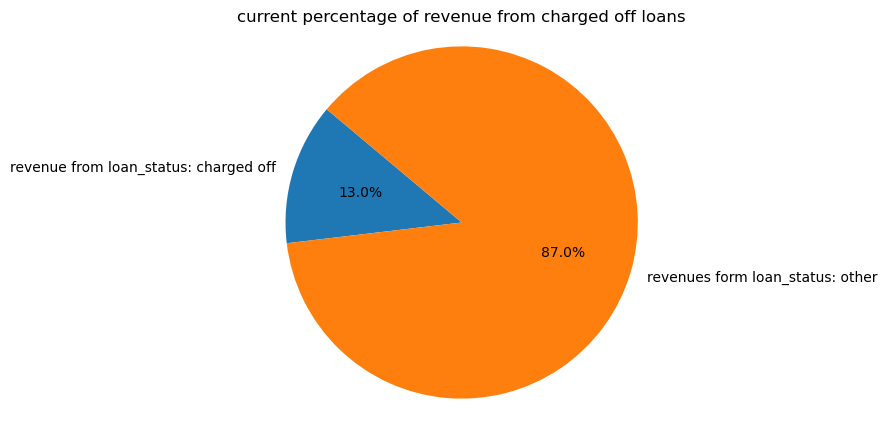

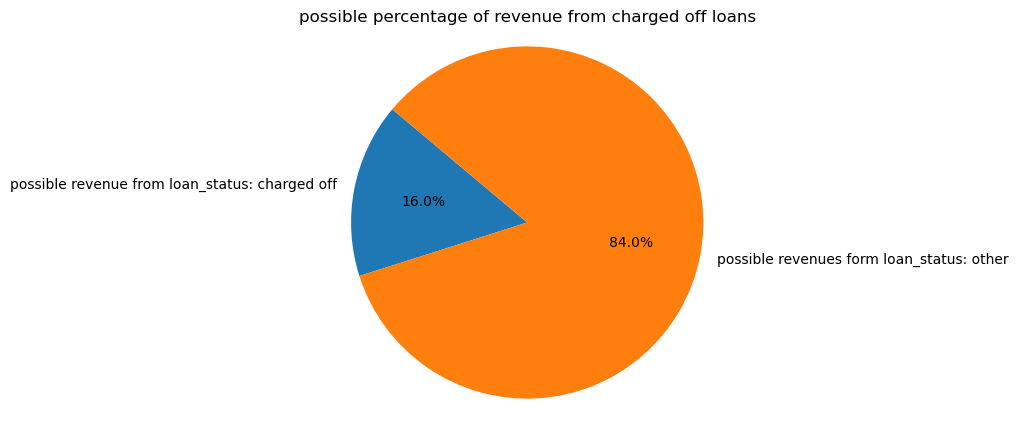

In [36]:
# Making 2 data frames one each containg one of the late loan statuses
late_31_120_mask = dff['loan_status'] == 'Late (31-120 days)'
late_16_30_mask = dff['loan_status'] == 'Late (16-30 days)'
late_31_120_df = dff.loc[late_31_120_mask].copy()
late_16_30_df = dff.loc[late_16_30_mask].copy()

# Dataframe containg all loans that have loan_status late
late_df = pd.concat([late_31_120_df, late_31_120_df], ignore_index = True, sort = False)
# Expected revenues from charged off loans, late loans and expected revenue if all loans together 
late_df['expected_revenue'] = late_df['loan_amount'] * (late_df['term']/12) * (late_df['int_rate']/100)
charged_off_df['expected_revenue'] = charged_off_df['loan_amount'] * (charged_off_df['term']/12) * (charged_off_df['int_rate']/100)
dff['expected_revenue'] = dff['loan_amount'] * (dff['term']/12) * (dff['int_rate']/100)
# Expected revenue from late, charged off and others
late_expt_rev = late_df['expected_revenue'].sum()
charged_off_expt_rev = charged_off_df['expected_revenue'].sum()
total_exp_rev = dff['expected_revenue'].sum()
# Possible charged off loans and current charged off leans
total_charged_off = late_expt_rev + charged_off_expt_rev
poss_total_charged_off_percentage = (total_charged_off / total_exp_rev) * 100
poss_revenue_left_percentage = 100 - poss_total_charged_off_percentage

# current charged off loans
current_total_charged_off_percentage = (charged_off_expt_rev / total_exp_rev) * 100
current_revenue_left_percentage = 100 - current_total_charged_off_percentage

# Plotting pie chart of current revenue represented by charged off loans
labels = ['revenue from loan_status: charged off', 'revenues form loan_status: other ']
sizes = [current_total_charged_off_percentage, current_revenue_left_percentage]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('current percentage of revenue from charged off loans')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Plotting pie chart of current and possibly  revenue represented by charged off loans
labels = ['possible revenue from loan_status: charged off', 'possible revenues form loan_status: other ']
sizes = [poss_total_charged_off_percentage, poss_revenue_left_percentage]
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('possible percentage of revenue from charged off loans')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


### TASK 5

In [37]:
# Dataframe containg data where loan status is not charged of or a late payment
loan_status_other_df = dff.loc[~late_16_30_mask].copy()
loan_status_other_df = loan_status_other_df[~late_31_120_mask].copy()
loan_status_other_df = loan_status_other_df[~charged_off_mask].copy()
loan_status_other_df = loan_status_other_df[~charged_off_mask3].copy()

# Dataframe containing loan_status charged off and late payemnts
charged_off_late_df = dff.loc[late_16_30_mask | late_31_120_mask | charged_off_mask |charged_off_mask3].copy()


C:\Users\samie\AppData\Local\Temp\ipykernel_6452\4227749564.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\samie\AppData\Local\Temp\ipykernel_6452\4227749564.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\samie\AppData\Local\Temp\ipykernel_6452\4227749564.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



## Looking at loan terms

### Charged off and possible charged off loans

term
36    4251
60    2288
Name: count, dtype: Int64


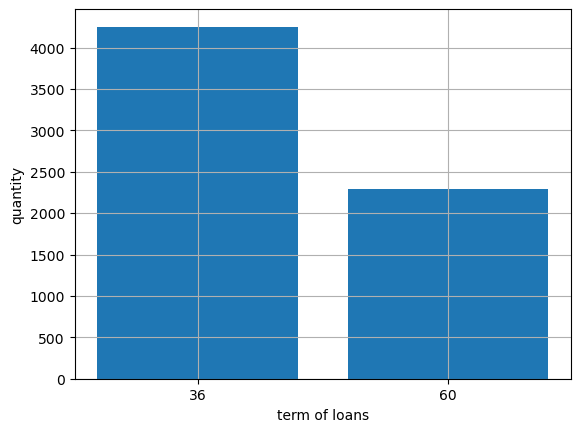

In [38]:
# Looking at term of loans
unique_values = charged_off_late_df['term'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='term of loans', ylabel= 'quantity', rotation=0, grid=True)


### Other loans


term
36    36250
60    11311
Name: count, dtype: Int64


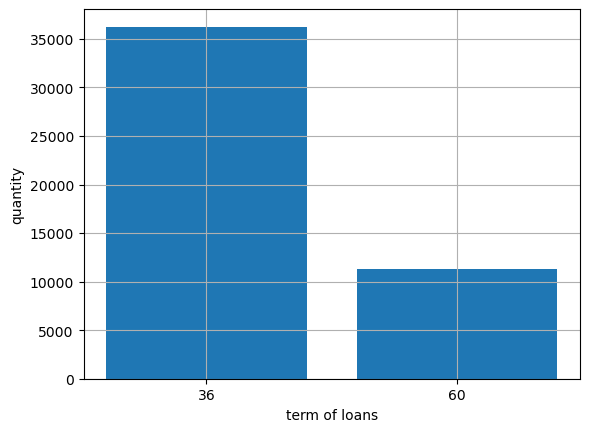

In [39]:

unique_values = loan_status_other_df['term'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='term of loans', ylabel= 'quantity', rotation=0, grid=True)


For both types of loans a 36 month term is the most commen compared to 60 month.

## Looking at loans grades

### Charged off and possible chaged off loans

grade
C    1723
B    1491
D    1412
E     873
A     452
F     429
G     159
Name: count, dtype: int64


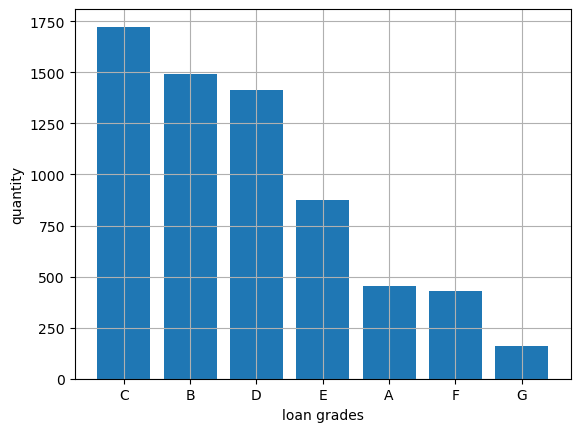

In [40]:
# Looking at loan grade
unique_values = charged_off_late_df['grade'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='loan grades', ylabel= 'quantity', rotation=0, grid=True)


### Other loans


grade
B    14850
C    11843
A     9350
D     6720
E     3183
F     1259
G      356
Name: count, dtype: int64


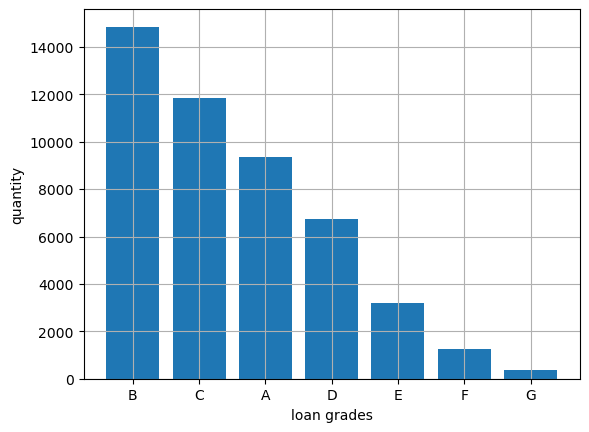

In [41]:
unique_values = loan_status_other_df['grade'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='loan grades', ylabel= 'quantity', rotation=0, grid=True)


The most commen type of loangrade in charged/possibly charged off loans is C followed by B where as for the other types of loans they are B followed by C. Looking at the rest of the loan grade data we canot say for certian that loan grade effects if they default or not.

## Looking at loan sub grade

### Charged off and possible chaged off loans

sub_grade
C3    375
B4    371
C2    367
C1    356
B5    344
C4    327
D2    324
B3    311
C5    298
D3    296
D1    276
D4    273
B2    265
D5    243
E1    206
B1    200
E2    190
E3    189
A5    173
E4    157
A4    142
E5    131
F1    111
F2     98
F3     80
F4     75
A3     73
F5     65
A2     52
G1     45
G2     33
G3     33
G4     27
G5     21
A1     12
Name: count, dtype: int64


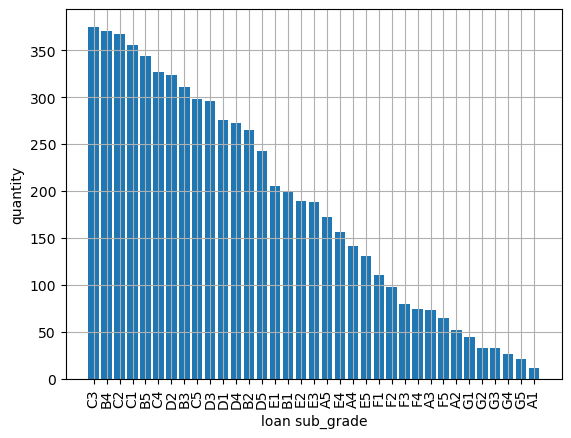

In [42]:
# Looking at loan sub_grade
unique_values = charged_off_late_df['sub_grade'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='loan sub_grade', ylabel= 'quantity', rotation=90, grid=True)


### other loans


sub_grade
B3    3325
B4    3165
B2    2971
B1    2726
B5    2663
C1    2657
A5    2613
C2    2583
A4    2500
C3    2411
C4    2178
C5    2014
A3    1676
D1    1556
D2    1481
A2    1423
D3    1345
D4    1232
A1    1138
D5    1106
E2     789
E1     780
E3     627
E4     497
E5     490
F1     374
F2     292
F3     245
F4     209
F5     139
G1     109
G2      97
G3      53
G5      50
G4      47
Name: count, dtype: int64


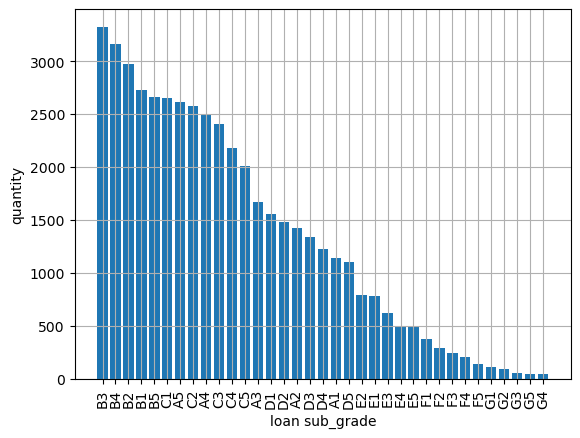

In [43]:
# Looking at loan sub_grade
unique_values = loan_status_other_df['sub_grade'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='loan sub_grade', ylabel= 'quantity', rotation=90, grid=True)


As mentioned for loan grades the loan sub grades also offer little support that they effect weather someone defaults on a loan. 

## Looking at employment length of the loan holder

### Charged off and possible chaged off loans

employment_length
10+ years    2136
< 1 year      656
2 years       616
3 years       582
5 years       480
1 year        443
4 years       403
6 years       380
7 years       333
8 years       266
9 years       244
Name: count, dtype: int64


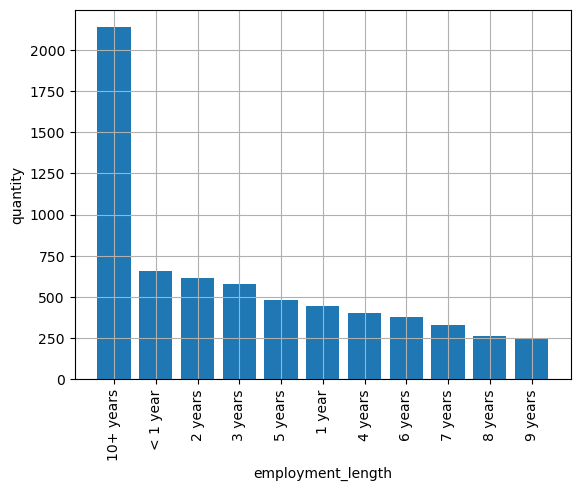

In [44]:
# Looking at employment_length of loan holder
unique_values = charged_off_late_df['employment_length'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='employment_length', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


employment_length
10+ years    15872
2 years       4434
< 1 year      4354
3 years       3997
5 years       3346
1 year        3244
4 years       3070
6 years       2669
7 years       2627
8 years       2266
9 years       1682
Name: count, dtype: int64


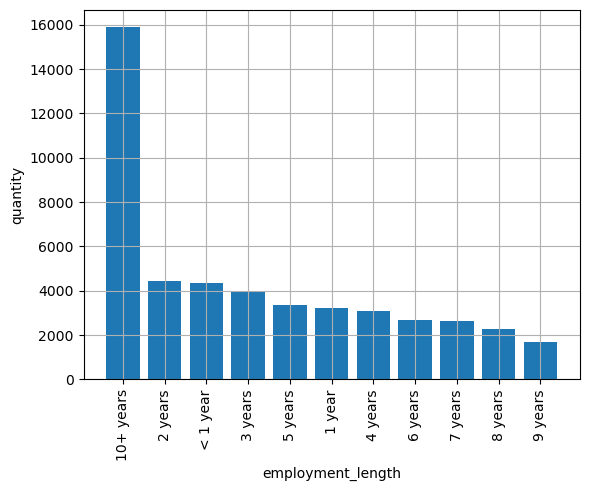

In [45]:
# Looking at employment_length of loan holder
unique_values = loan_status_other_df['employment_length'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='employment_length', ylabel= 'quantity', rotation=90, grid=True)


The proportion of employment legths seems to be roughly the same between them as well.

## Looking at home ownership of the loan holder

### Charged off and possible chaged off loans

home_ownership
RENT        3033
MORTGAGE    2889
OWN          602
OTHER         14
NONE           1
Name: count, dtype: int64


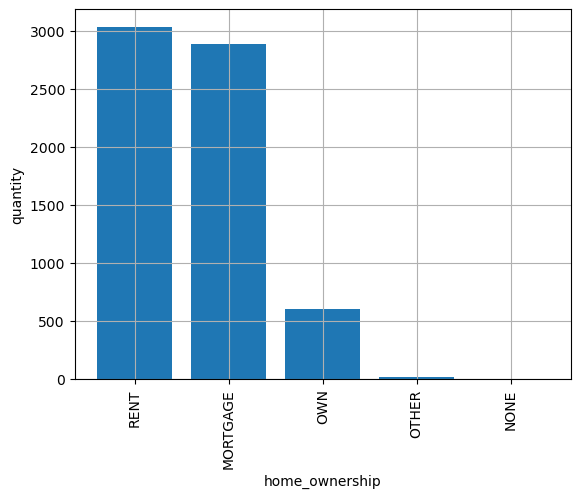

In [46]:
# Looking at home_ownership of loan holder
unique_values = charged_off_late_df['home_ownership'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='home_ownership', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


home_ownership
MORTGAGE    23989
RENT        19388
OWN          4135
OTHER          49
Name: count, dtype: int64


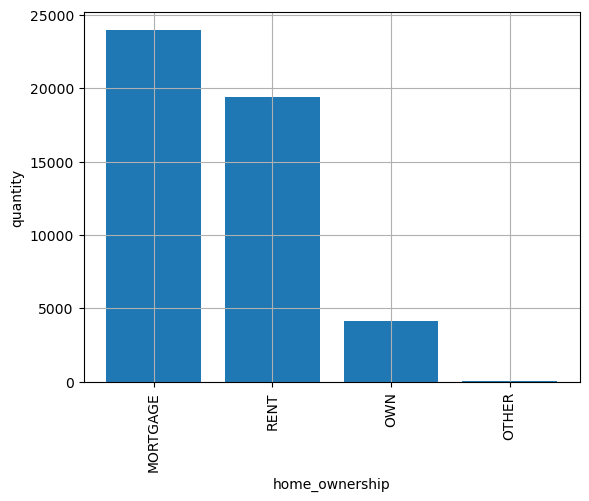

In [47]:
# Looking at home_ownership of loan holder
unique_values = loan_status_other_df['home_ownership'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='home_ownership', ylabel= 'quantity', rotation=90, grid=True)


The top 2 categories for home ownership for both cgrged off/ possible charged off loans and others are mortgage and rent

## Looking at verification status of income source

### Charged off and possible chaged off loans

verification_status
Verified           2744
Not Verified       1983
Source Verified    1812
Name: count, dtype: int64


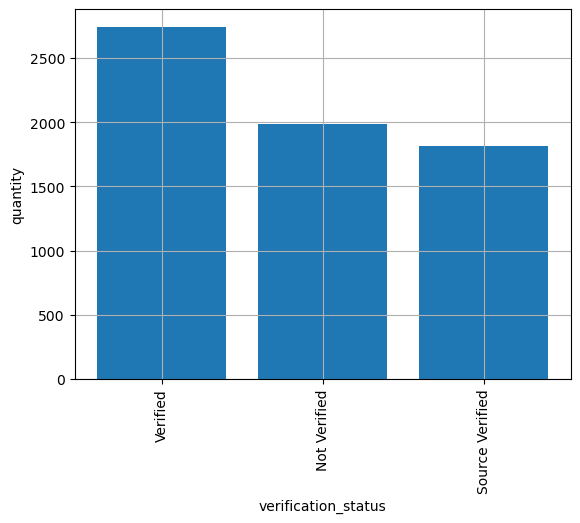

In [48]:
# Looking at verification_status of loan 
unique_values = charged_off_late_df['verification_status'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='verification_status', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


verification_status
Verified           18015
Not Verified       15494
Source Verified    14052
Name: count, dtype: int64


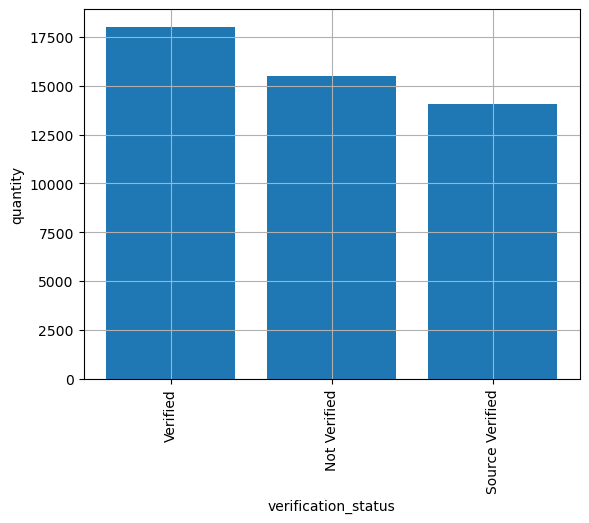

In [49]:
# Looking at verification_status of loan 
unique_values = loan_status_other_df['verification_status'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='verification_status', ylabel= 'quantity', rotation=90, grid=True)


The ratio of verified:not verified:source verified of the loan holders income seems to be similar for booth as well.

## Looking at payment plan of loans



### Charged off and possible chaged off loans

payment_plan
n    6539
Name: count, dtype: int64


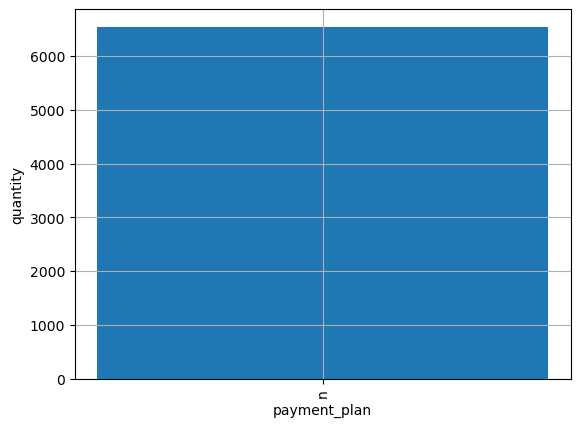

In [50]:
# Looking at payment_plan of loan 
unique_values = charged_off_late_df['payment_plan'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='payment_plan', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


payment_plan
n    47560
y        1
Name: count, dtype: int64


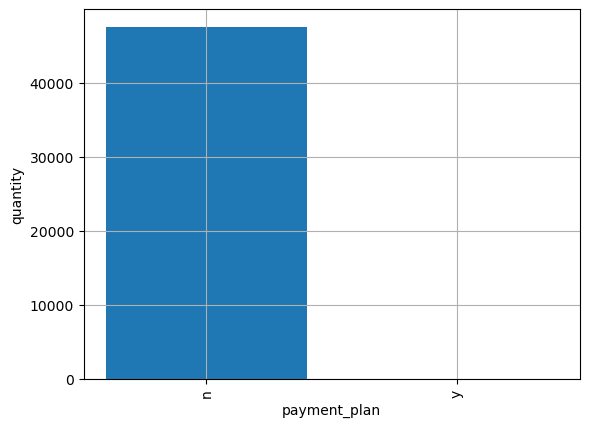

In [51]:
# Looking at payment_plan of loan 
unique_values = loan_status_other_df['payment_plan'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='payment_plan', ylabel= 'quantity', rotation=90, grid=True)


The most commen payment plan for both are payment plan n. But for the others data there 1 person on payment plan y. Eventhough there is one person on payment plan y and none in charged/possibly charged loans we cannot say that everyone on payment plan y will be able to pay thier loans as there is not enought datat on those who are on payment plan y.

## Looking at purpose of loan

### Charged off and possible chaged off loans

purpose
debt_consolidation    3608
credit_card           1048
other                  568
small_business         343
home_improvement       338
major_purchase         180
car                    102
medical                 93
moving                  75
wedding                 46
house                   45
vacation                41
educational             40
renewable_energy        12
Name: count, dtype: int64


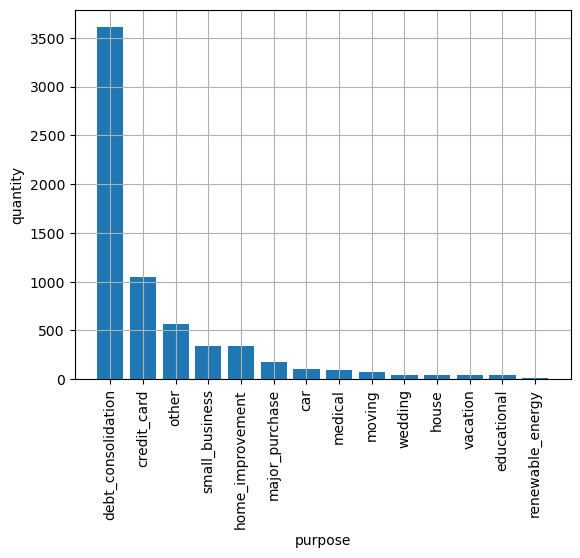

In [52]:
# Looking at purpose of loan 
unique_values = charged_off_late_df['purpose'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='purpose', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


purpose
debt_consolidation    25938
credit_card           10068
other                  3113
home_improvement       2866
major_purchase         1495
small_business          959
car                     916
medical                 536
wedding                 487
moving                  379
house                   305
vacation                278
educational             155
renewable_energy         66
Name: count, dtype: int64


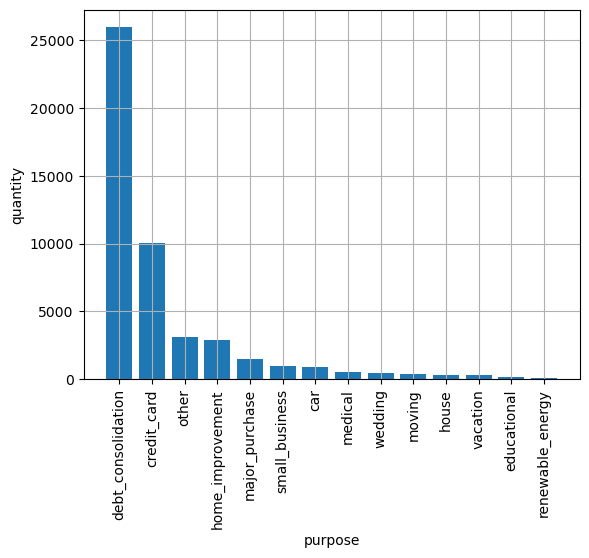

In [53]:
unique_values = loan_status_other_df['purpose'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='purpose', ylabel= 'quantity', rotation=90, grid=True)


The 3 most commen loan purpose for charged/possibly charged loans and others loans are tdebt consolidation, cerdit card and other. So purpose of the loan does ot seem to show weather or not someone is able to pay.

## Looking at the number of open accounts 

### Charged off and possible chaged off loans

open_accounts
7     622
9     613
10    600
8     597
11    522
6     485
12    431
5     365
13    364
14    288
4     257
15    254
16    181
3     164
17    154
18    116
19    111
2      85
20     69
21     60
22     46
23     35
25     33
24     26
27     14
26     10
29      6
31      6
30      6
33      4
1       4
28      3
34      3
41      1
36      1
35      1
38      1
47      1
Name: count, dtype: int64


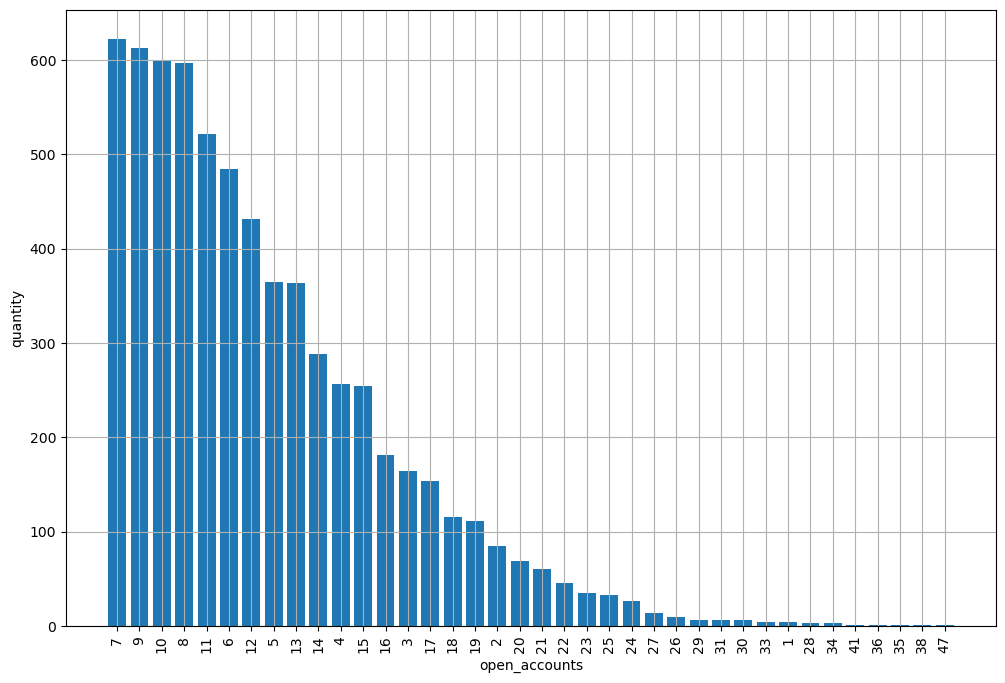

In [54]:
# looking at the amount of open_accounts
unique_values = charged_off_late_df['open_accounts'].value_counts()
print(unique_values)
plt.figure(figsize= (12,8))
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='open_accounts', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


open_accounts
9     4520
8     4466
10    4238
7     4102
11    3890
6     3585
12    3347
13    2833
5     2623
14    2361
15    1885
4     1656
16    1502
17    1228
18     965
3      922
19     732
20     569
21     438
22     360
2      323
23     233
24     215
25     152
26     105
27      66
28      54
29      33
1       28
30      25
31      24
32      17
33      12
34      12
39       8
35       7
41       4
43       4
38       3
42       3
37       3
36       3
48       1
40       1
51       1
53       1
46       1
Name: count, dtype: int64


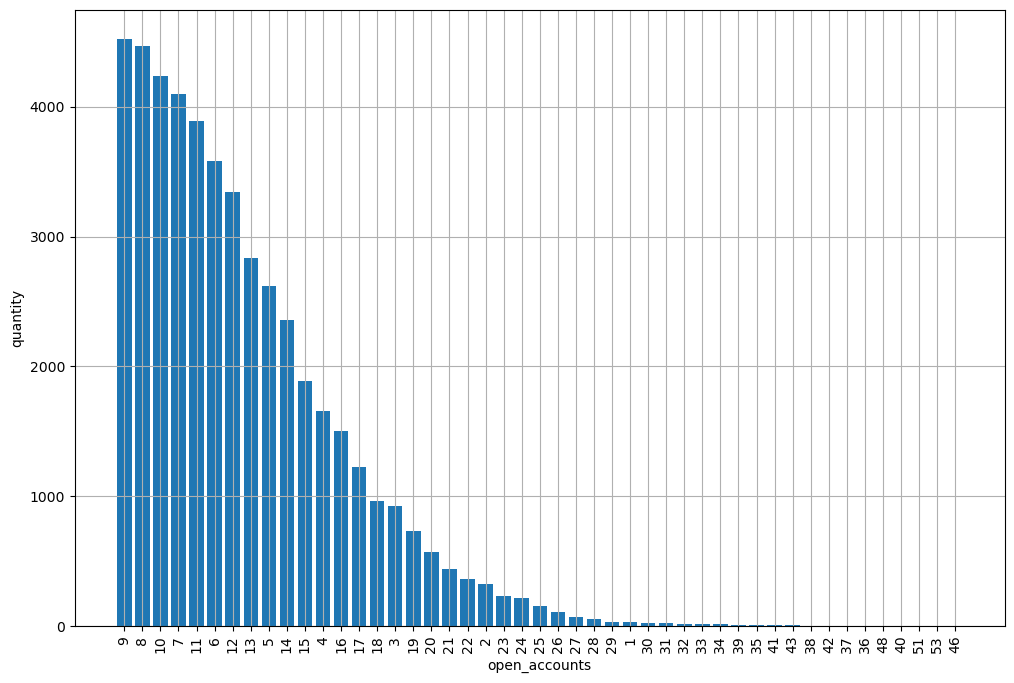

In [55]:
# Looking at the amount of open_accounts
unique_values = loan_status_other_df['open_accounts'].value_counts()
print(unique_values)
plt.figure(figsize= (12,8))
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='open_accounts', ylabel= 'quantity', rotation=90, grid=True)


7, 8, 9 and 10 open accounts are the top 4 number of open accounts held by the loan payer so it cannot be used as an indicator of loss.

## Looking at the total number of accounts the loan holder has

### Charged off and possible chaged off loans

total_accounts
14    241
23    235
15    233
17    232
19    231
     ... 
97      1
74      1
70      1
78      1
67      1
Name: count, Length: 70, dtype: int64


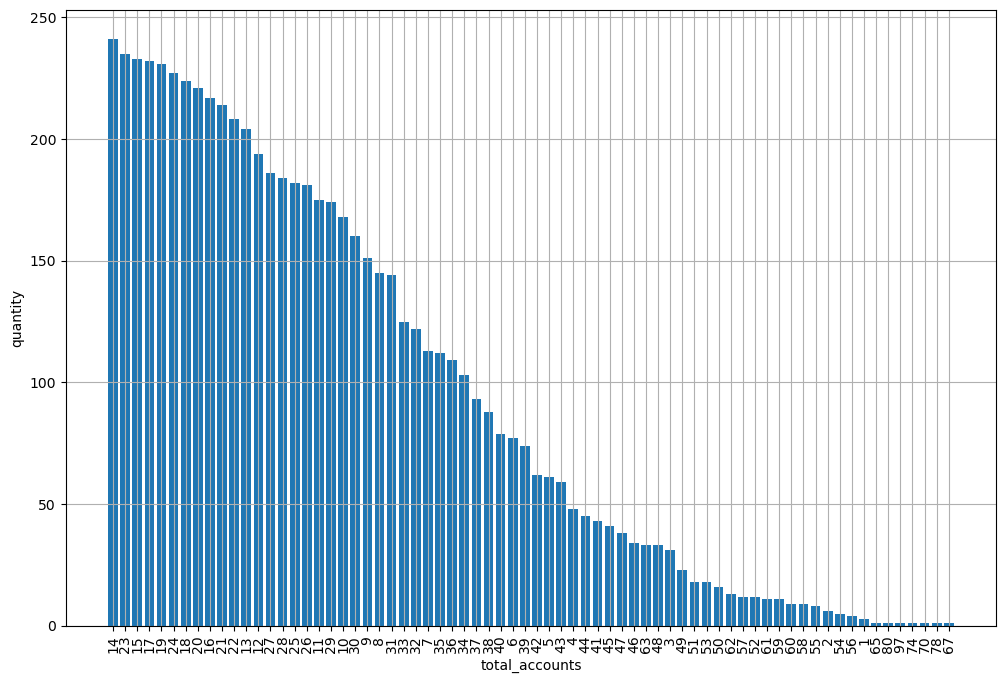

In [56]:
# Looking at total_accounts 
unique_values = charged_off_late_df['total_accounts'].value_counts()
print(unique_values)
plt.figure(figsize= (12,8))
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='total_accounts', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


total_accounts
20     1740
17     1718
22     1716
18     1711
21     1706
       ... 
83        1
88        1
108       1
82        1
89        1
Name: count, Length: 87, dtype: int64


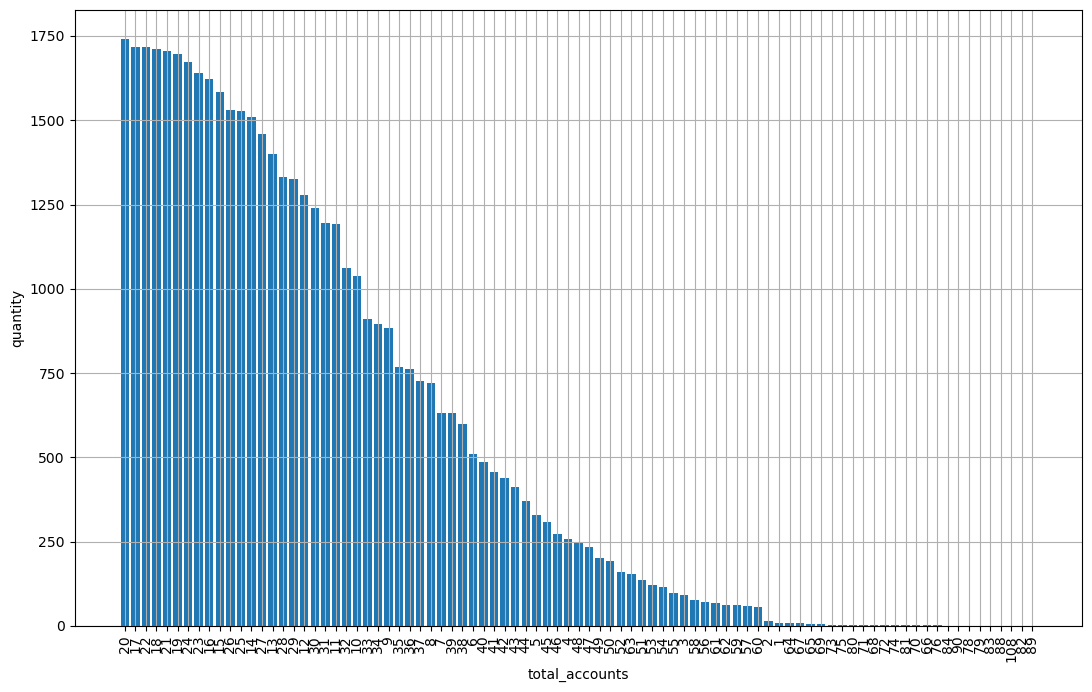

In [57]:
# Looking at total_accounts 
unique_values = loan_status_other_df['total_accounts'].value_counts()
print(unique_values)
plt.figure(figsize= (13,8))
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='total_accounts', ylabel= 'quantity', rotation=90, grid=True)


Total number of accounts also seem to have little ability of being an indicator of loss as being able to pay and not being ale to pay once agian are far to similar

## Looking at payment plan of the loan

### Charged off and possible chaged off loans

policy_code
1    6539
Name: count, dtype: int64


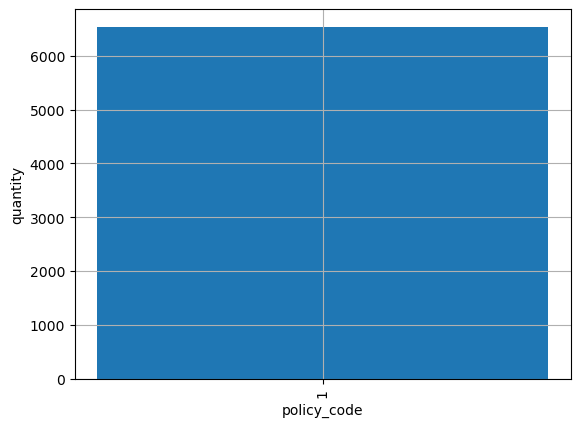

In [58]:
# Looking at payment_plan of loan 
unique_values = charged_off_late_df['policy_code'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='policy_code', ylabel= 'quantity', rotation=90, grid=True)


### Other loans


policy_code
1    47561
Name: count, dtype: int64


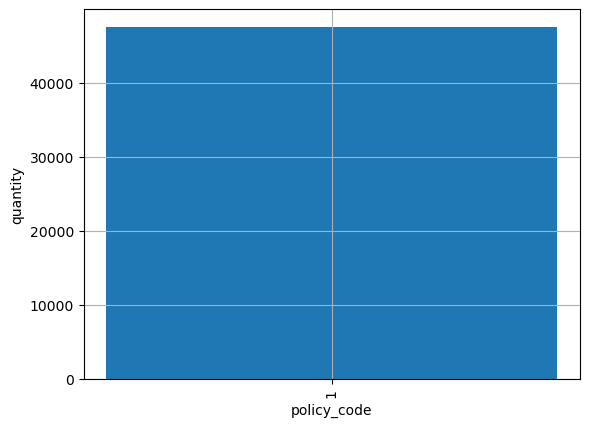

In [59]:
# Looking at payment_plan of loan 
unique_values = loan_status_other_df['policy_code'].value_counts()
print(unique_values)
plotter.bar_chart_plot(index = unique_values.index.astype(str), values = unique_values, xlabel='policy_code', ylabel= 'quantity', rotation=90, grid=True)


The only policy code for them is 1.

Looking at these indepndednt vaiables we can not say for certian that they are loss indicators as the visual datta suggest that these variable are roughly the same for those able to pay and those unable. 